----
# Taller 1
----

# Instrucciones

En consonancia con la situación actual, en este ejercicio os propongo que exploréis un dataset asociado al COVID-19.

La enfermedad por coronavirus 2019 (COVID-19) es una enfermedad infecciosa causada por el coronavirus 2 del síndrome respiratorio agudo severo (SARS-CoV-2). Se identificó por primera vez en 2019 en Wuhan, China, y desde entonces se ha propagado a nivel mundial, lo que ha resultado en la pandemia de coronavirus 2019-20. Los síntomas comunes incluyen fiebre, tos y dificultad para respirar. El dolor muscular, la producción de esputo y el dolor de garganta son menos comunes. La tasa de muertes por número de casos diagnosticados es, en promedio, del 3,4%, oscilando entre el 0,2% en los menores de 20 años y aproximadamente el 15% en los mayores de 80 años.

Los datos que vamos a explorar provienenen del dataset disponible en: https://github.com/datadista/datasets/tree/master/COVID%2019 que contiene información sobre la situación diaria acumulada de la enfermedad por el coronavirus SARS-CoV-2 (COVID-19) en España en un formato accesible y reutilizable. 

En nuestro caso vamos a estudiar el fichero [ccaa_covid19_datos_isciii.csv](https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/ccaa_covid19_datos_isciii.csv), que contiene datos a nivel de casos registrados por Comunidad Autónoma. 

| Campo	        | Descripción	        | Formato  | Ejemplo |
| :-------------|:-------------------------------------------------------------------|----------|:-----------:|
| fecha	        | Fecha de notificación	| YYYY-MM-DD	| 2020-03-20|
| cod_ine	    | Código INE de CCAA	| Texto	   | 11|
| CCAA	        | Comunidad autónoma	| Texto	   | Madrid|
| Caso	        | Casos confirmados acumulados (NaN si no hay casos)	| Número |	7|
| Hospitalizados| Casos acumulados que han precisado hospitalización (incluyen UCI)|	Número	|7|
| UCI	        | Casos acumulados que han precisado ingreso en UCI|	Número|	7|
| Fallecidos	| Personas fallecidas acumuladas	|Número	|7|
| Recuperados	| Personas curadas acumuladas	|Número|7|


# Ejercicios



1. Escribe un programa de Python para mostrar las primeras 5 filas del conjunto de datos COVID-19 (0.25 puntos). Imprime también as 5 ultimas filas del conjunto (0.25 puntos), la información del conjunto de datos (0.25 puntos) y estima cuántos valores ausentes (NaN) hay en cada columna y sustitúyelos por 0's (0.25 puntos).


In [33]:
import pandas as pd
# Datos desactualizados en la url, utilizar el dataset adjunto
# url = 'https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/ccaa_covid19_datos_isciii.csv'
df = pd.read_csv('ccaa_covid19_datos_isciii.csv')
df.head()

,Fecha,cod_ine,CCAA,Casos,PCR+,TestAc+,Hospitalizados,UCI,Fallecidos,Recuperados
0,2020-02-20,1,Andalucía,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-20,2,Aragón,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-20,3,Asturias,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-20,4,Baleares,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-20,5,Canarias,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df.tail()

,Fecha,cod_ine,CCAA,Casos,PCR+,TestAc+,Hospitalizados,UCI,Fallecidos,Recuperados
1458,2020-05-06,19,Melilla,NaN,119.0,13.0,44.0,3.0,2.0,108.0
1459,2020-05-06,14,Murcia,NaN,1501.0,691.0,652.0,111.0,137.0,1527.0
1460,2020-05-06,15,Navarra,NaN,4983.0,2027.0,2015.0,135.0,480.0,2732.0
1461,2020-05-06,16,País Vasco,NaN,13041.0,3918.0,6797.0,561.0,1383.0,13070.0
1462,2020-05-06,17,La Rioja,NaN,3986.0,1344.0,1463.0,91.0,338.0,2457.0


In [35]:
df.describe()

,cod_ine,Casos,PCR+,TestAc+,Hospitalizados,UCI,Fallecidos,Recuperados
count,1463.000000,844.000000,490.000000,384.000000,1123.000000,1157.000000,1140.000000,1121.000000
mean,10.000000,2627.286730,11209.216327,1118.752604,3089.682992,298.723423,670.642105,2621.943800
std,5.479098,5228.445887,16322.713305,1324.046643,5848.169800,557.608620,1426.295179,5966.109021
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,25.000000,1885.750000,154.250000,165.000000,14.000000,8.750000,19.000000
50%,10.000000,560.000000,4128.500000,685.000000,997.000000,106.000000,139.000000,513.000000
75%,15.000000,2461.250000,12208.500000,1342.500000,3133.500000,312.000000,569.500000,2017.000000
max,19.000000,38316.000000,63870.000000,6383.000000,41159.000000,3485.000000,8504.000000,38670.000000


In [36]:
print('Valores NaN por columna:')
print(df.isna().sum())
df.fillna(0,inplace=True) # Reemplaza los valores NaN por 0

Valores NaN por columna:
Fecha                0
cod_ine              0
CCAA                 0
Casos              619
PCR+               973
TestAc+           1079
Hospitalizados     340
UCI                306
Fallecidos         323
Recuperados        342
dtype: int64


2. Escribe un programa de Python para obtener el número total de casos confirmados, hospitalizados, trasladados a la UCI, fallecidos y recuperados. Antes asegúrate de cargar de nuevo los datos importan el campo de las fechas como *datetime* y sustituye los valores *NaN* por *0's* (0.25). Convierte los valores numericos a *int* (0.25). Luego crea un nuevo dataframe con la información del último día (0.25) y computa el total acumulando todos los valores de todas las CCAA (0.25). 

In [37]:
# parse-dates importa automaticamente las fechas como datetime64
df = pd.read_csv('ccaa_covid19_datos_isciii.csv',parse_dates=['Fecha']).fillna(0) 
df[['Casos','Hospitalizados','UCI','Fallecidos','Recuperados']].sum()

Casos             2217430.0
Hospitalizados    3469714.0
UCI                345623.0
Fallecidos         764532.0
Recuperados       2939199.0
dtype: float64

In [38]:
df = df.astype(int,errors='ignore')
df

,Fecha,cod_ine,CCAA,Casos,PCR+,TestAc+,Hospitalizados,UCI,Fallecidos,Recuperados
0,2020-02-20,1,Andalucía,0,0,0,0,0,0,0
1,2020-02-20,2,Aragón,0,0,0,0,0,0,0
2,2020-02-20,3,Asturias,0,0,0,0,0,0,0
3,2020-02-20,4,Baleares,1,0,0,0,0,0,0
4,2020-02-20,5,Canarias,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1458,2020-05-06,19,Melilla,0,119,13,44,3,2,108
1459,2020-05-06,14,Murcia,0,1501,691,652,111,137,1527
1460,2020-05-06,15,Navarra,0,4983,2027,2015,135,480,2732
1461,2020-05-06,16,País Vasco,0,13041,3918,6797,561,1383,13070


In [39]:
df_ultimo_dia = df.iloc[[-1]]
df_ultimo_dia

,Fecha,cod_ine,CCAA,Casos,PCR+,TestAc+,Hospitalizados,UCI,Fallecidos,Recuperados
1462,2020-05-06,17,La Rioja,0,3986,1344,1463,91,338,2457


In [40]:
df.groupby(['CCAA']).sum()

,cod_ine,Casos,PCR+,TestAc+,Hospitalizados,UCI,Fallecidos,Recuperados
CCAA,,,,,,,,
Andalucía,77,0,431261,28629,211416,24813,35455,127580
Aragón,154,68358,108157,13491,85145,10367,21391,53165
Asturias,231,36628,49285,8721,57951,4797,7240,21585
Baleares,308,32443,36960,1291,35982,6070,5412,34575
C. Valenciana,770,166980,212254,29771,195747,25996,38343,158535
Canarias,385,36208,47233,0,33255,6461,4445,27035
Cantabria,462,37185,40138,5222,35568,3049,5462,27951
Castilla La Mancha,616,264132,296252,74064,272769,20685,73626,134751
Castilla y León,539,241953,310848,55170,269297,18454,54109,183592


3. Estima ahora la última cifra de casos confirmados, fallecidos y recuperados por CCAA. Para ello, asigna la columna *CCAA* como índice (hazo *inplace*, 0.5 puntos) y muestra los datos ordenados según número de casos, número de fallecidos y número de recuperados (0.5 puntos)

In [41]:
df.set_index(['CCAA'],inplace=True)

In [42]:
#df[['Fecha','Casos','Fallecidos']]
df.groupby(['CCAA']).last().sort_values(['Casos','Fallecidos','Recuperados'])

,Fecha,cod_ine,Casos,PCR+,TestAc+,Hospitalizados,UCI,Fallecidos,Recuperados
CCAA,,,,,,,,,
Melilla,2020-05-06,19,0,119,13,44,3,2,108
Ceuta,2020-05-06,18,0,109,56,10,4,4,150
Murcia,2020-05-06,14,0,1501,691,652,111,137,1527
Canarias,2020-05-06,5,0,2235,0,921,176,144,1258
Cantabria,2020-05-06,6,0,2220,422,1020,79,200,1758
Baleares,2020-05-06,4,0,1929,94,1132,169,201,1345
Asturias,2020-05-06,3,0,2326,773,2117,143,292,971
La Rioja,2020-05-06,17,0,3986,1344,1463,91,338,2457
Extremadura,2020-05-06,11,0,2877,931,1664,108,467,2265


4. ¿Cual es la última cifra de casos confirmados, hospitalizados, trasladados a la UCI, fallecidos y recuperados de COVID-19 en Navarra? (0.5 puntos). ¿Y el número de casos activos (i.e.: Casos - (Fallecidos + Recuperados))? (0.5 puntos).

In [46]:
df.loc[df.index=='Navarra'][['Casos','Hospitalizados','UCI','Fallecidos','Recuperados']].iloc[[-1]]

,Casos,Hospitalizados,UCI,Fallecidos,Recuperados
CCAA,,,,,
Navarra,0,2015,135,480,2732


In [29]:
print("Casos activos: ", df.loc[df['CCAA']=='Navarra'].sum()['Casos'] - (df.loc[df['CCAA']=='Navarra'].sum()['Fallecidos'] + df.loc[df['CCAA']=='Navarra'].sum()['Recuperados']))


Casos activos:  18978.0


5. Añade una columna de casos activos al dataframe **original** con los casos activos (*Activos*) en cada momento. Para ello, recuerda  cargar de nuevo el fichero, considerar las fechas como *datetime*, sustituir los *NaN's* por *0's* y convertir los valores numéricos a *int*. Luego puedes añadir la nueva columna *Activos*. (1 punto)

In [47]:
df = pd.read_csv('ccaa_covid19_datos_isciii.csv',parse_dates=['Fecha']).fillna(0).astype(int,errors='ignore')
df['Activos'] = df['Casos'] - (df['Fallecidos'] + df['Recuperados'])
df

,Fecha,cod_ine,CCAA,Casos,PCR+,TestAc+,Hospitalizados,UCI,Fallecidos,Recuperados,Activos
0,2020-02-20,1,Andalucía,0,0,0,0,0,0,0,0
1,2020-02-20,2,Aragón,0,0,0,0,0,0,0,0
2,2020-02-20,3,Asturias,0,0,0,0,0,0,0,0
3,2020-02-20,4,Baleares,1,0,0,0,0,0,0,1
4,2020-02-20,5,Canarias,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1458,2020-05-06,19,Melilla,0,119,13,44,3,2,108,-110
1459,2020-05-06,14,Murcia,0,1501,691,652,111,137,1527,-1664
1460,2020-05-06,15,Navarra,0,4983,2027,2015,135,480,2732,-3212
1461,2020-05-06,16,País Vasco,0,13041,3918,6797,561,1383,13070,-14453


6. Escribe un programa de Python para identificar el día en el que se produjeron los primeros casos por COVID-19 en España (0.5 puntos). ¿Y los primeros fallecimientos (0.5 puntos)? 

In [77]:
print("El día del primer caso fué: ",df.loc[df['Casos']>0].iloc[0][0])

El día del primer caso fué:  2020-02-20 00:00:00


In [76]:
print("El día del primer fallecido fué: ",df.loc[df['Fallecidos']>0].iloc[0][0])

El día del primer fallecido fué:  2020-03-08 00:00:00


7. Escribe un programa de Python que devuelva la fecha en que se detectó el primer fallecido de COVID-19 en cada CCAA (0.5 puntos). Muéstralos de forma ordenada en función de la fecha (0.5 puntos)


In [79]:
df.loc[df['Fallecidos']>0].groupby(['CCAA']).first()

,Fecha,cod_ine,Casos,PCR+,TestAc+,Hospitalizados,UCI,Fallecidos,Recuperados,Activos
CCAA,,,,,,,,,,
Andalucía,2020-03-13,1,0,269,0,92,8,2,0,-2
Aragón,2020-03-08,2,13,0,0,0,3,3,0,10
Asturias,2020-03-11,3,47,0,0,12,2,1,1,45
Baleares,2020-03-11,4,22,0,0,8,2,1,1,20
C. Valenciana,2020-03-08,10,37,0,0,153,9,1,1,35
Canarias,2020-03-13,5,90,0,0,15,6,1,7,82
Cantabria,2020-03-17,6,68,0,0,25,3,1,10,57
Castilla La Mancha,2020-03-11,8,115,0,0,39,9,1,2,112
Castilla y León,2020-03-13,7,169,0,0,25,8,1,2,166


In [80]:
df.loc[df['Fallecidos']>0].groupby(['CCAA']).first().sort_values('Fecha')

,Fecha,cod_ine,Casos,PCR+,TestAc+,Hospitalizados,UCI,Fallecidos,Recuperados,Activos
CCAA,,,,,,,,,,
Cataluña,2020-03-08,9,59,0,0,16,5,2,2,55
Madrid,2020-03-08,13,0,992,0,0,53,16,0,-16
C. Valenciana,2020-03-08,10,37,0,0,153,9,1,1,35
País Vasco,2020-03-08,16,149,0,0,0,5,6,2,141
Aragón,2020-03-08,2,13,0,0,0,3,3,0,10
La Rioja,2020-03-09,17,144,0,0,0,1,1,0,143
Extremadura,2020-03-10,11,9,0,0,2,1,1,1,7
Asturias,2020-03-11,3,47,0,0,12,2,1,1,45
Castilla La Mancha,2020-03-11,8,115,0,0,39,9,1,2,112


8. Escribe un código para crear un gráfico de cómo ha evolucionado el total de casos confirmados, hospitalizados, trasladados a la UCI, fallecidos y recuperados a nivel de toda España (1 puntos).

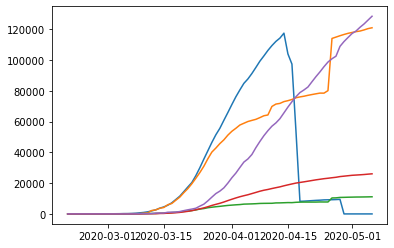

In [118]:
import matplotlib
import matplotlib.pyplot as plt

plt.plot(df['Fecha'].unique(),df.groupby(['Fecha']).sum()['Casos'])
plt.plot(df['Fecha'].unique(),df.groupby(['Fecha']).sum()['Hospitalizados'])
plt.plot(df['Fecha'].unique(),df.groupby(['Fecha']).sum()['UCI'])
plt.plot(df['Fecha'].unique(),df.groupby(['Fecha']).sum()['Fallecidos'])
plt.plot(df['Fecha'].unique(),df.groupby(['Fecha']).sum()['Recuperados'])

plt.show()

9. Escribe un programa para visualizar un gráfico de barras con los casos activos de COVID-19 por CCAA en la fecha 5 de Abril de 2020 (0.5 punto). Ordena el gráfico por el número de casos (de CCAA con menor número a mayor número de casos, (0.25 puntos).
Genera un gráfico combinado para el casos confirmados, fallecidos y recuperados en esa misma fecha, ordenándolos por número de casos confirmados (0.25 puntos).

   (Puedes utilizar las órdenes de la celda siguiente para definir la fecha como tipo *date*)

In [120]:
# Ejemplo para definir una fecha
import time
from datetime import date
fecha = date(2020,3,1)  # para definir el 1 de marzo de 2020
print(fecha)
type(fecha)

2020-03-01


datetime.date

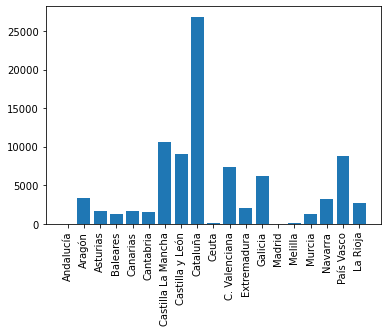

In [133]:
df_grafico = df.loc[df['Fecha']==pd.to_datetime(date(2020,4,5))]
plt.bar(df_grafico['CCAA'],df_grafico['Casos'])
plt.xticks(rotation=90)
plt.show()

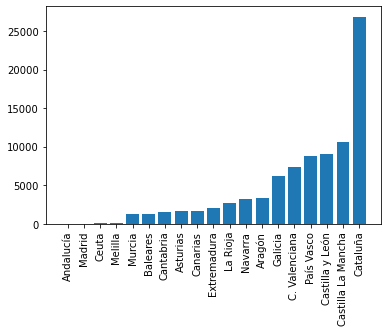

In [136]:
df_grafico = df.loc[df['Fecha']==pd.to_datetime(date(2020,4,5))].sort_values('Casos')
plt.bar(df_grafico['CCAA'],df_grafico['Casos'])
plt.xticks(rotation=90)
plt.show()

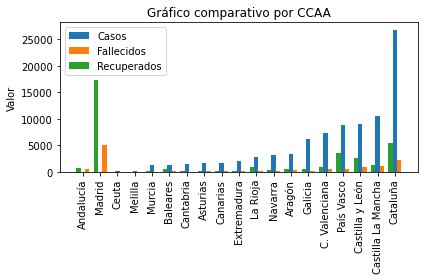

In [167]:
'''plt.bar(df_grafico['CCAA'],df_grafico['Casos'])
plt.bar(df_grafico['CCAA'],df_grafico['Fallecidos'])
plt.bar(df_grafico['CCAA'],df_grafico['Recuperados'])'''
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = df_grafico['CCAA']
casos = df_grafico['Casos']
fallecidos = df_grafico['Fallecidos']
recuperados = df_grafico['Recuperados']

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, casos, width, label='Casos')
rects2 = ax.bar(x + width, fallecidos, width, label='Fallecidos')
rects3 = ax.bar(x - width, recuperados, width, label='Recuperados')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.xticks(rotation=90)
ax.set_ylabel('Valor')
ax.set_title('Gráfico comparativo por CCAA')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

10. Propón una cuestión que querrías resolver sobre este dataset (se puntuará máximo 0.5 puntos en base a la originalidad y dificultad planteada) y escribe el código para resolverla (0.5 puntos)